## Sadržaj
 <br>
<b> Pretprocesiranje podataka </b>
 <br>
 <br/>&nbsp;&nbsp;&nbsp;&nbsp;• uvoz potrebnih biblioteka
 <br>
 <br/>&nbsp;&nbsp;&nbsp;&nbsp;• učitavanje skupa podataka
 <br>
 <br/>&nbsp;&nbsp;&nbsp;&nbsp;• primarna analiza skupa podataka
 <br/>
 <br>
<b> Ispitivanje korelisanosti podataka </b>
<br/>
<br>
<b> Modeli mašinskog učenja </b>
 <br>
 <br/>&nbsp;&nbsp;&nbsp;&nbsp;• naivni Bajesov klasifikator
 <br>
 <br/>&nbsp;&nbsp;&nbsp;&nbsp;• K najbližih suseda
 <br> 
 <br/>&nbsp;&nbsp;&nbsp;&nbsp;• <i> random forest </i> klasifikator
 <br> 
 <br/>&nbsp;&nbsp;&nbsp;&nbsp;• metoda potpornih vektora

## Pretprocesiranje podataka

Uvoz korišćenih biblioteka

In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score ,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

Učitavanje podataka

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Veličine skupova podataka

In [3]:
print('Train data info: ')
print(train_data.shape)
print('Test data info: ')
print(test_data.shape)

Train data info: 
(990, 194)
Test data info: 
(594, 193)


Ispis prvih 10 elemenata skupa

In [7]:
train_data.head(10)

id                species   margin1   margin2   margin3   margin4  \
0   1            Acer_Opalus  0.007812  0.023438  0.023438  0.003906   
1   2  Pterocarya_Stenoptera  0.005859  0.000000  0.031250  0.015625   
2   3   Quercus_Hartwissiana  0.005859  0.009766  0.019531  0.007812   
3   5        Tilia_Tomentosa  0.000000  0.003906  0.023438  0.005859   
4   6     Quercus_Variabilis  0.005859  0.003906  0.048828  0.009766   
5   8   Magnolia_Salicifolia  0.070312  0.093750  0.033203  0.001953   
6  10    Quercus_Canariensis  0.021484  0.031250  0.017578  0.009766   
7  11          Quercus_Rubra  0.000000  0.000000  0.037109  0.050781   
8  14        Quercus_Brantii  0.005859  0.001953  0.033203  0.015625   
9  15         Salix_Fragilis  0.000000  0.000000  0.009766  0.037109   

    margin5   margin6   margin7  margin8  ...  texture55  texture56  \
0  0.011719  0.009766  0.027344      0.0  ...   0.007812   0.000000   
1  0.025391  0.001953  0.019531      0.0  ...   0.000977   0.000000   
2  0.003906  0.005859  0.068359      0.0  ...   0.154300   0.000000   
3  0.021484  0.019531  0.023438      0.0  ...   0.000000   0.000977   
4  0.013672  0.015625  0.005859      0.0  ...   0.096680   0.000000   
5  0.000000  0.152340  0.007812      0.0  ...   0.145510   0.000000   
6  0.001953  0.042969  0.039062      0.0  ...   0.085938   0.000000   
7  0.003906  0.000000  0.003906      0.0  ...   0.038086   0.025391   
8  0.001953  0.000000  0.023438      0.0  ...   0.000000   0.000000   
9  0.072266  0.000000  0.000000      0.0  ...   0.000000   0.000000   

   texture57  texture58  texture59  texture60  texture61  texture62  \
0   0.002930   0.002930   0.035156    0.00000   0.000000   0.004883   
1   0.000000   0.000977   0.023438    0.00000   0.000000   0.000977   
2   0.005859   0.000977   0.007812    0.00000   0.000000   0.000000   
3   0.000000   0.000000   0.020508    0.00000   0.000000   0.017578   
4   0.021484   0.000000   0.000000    0.00000   0.000000   0.000000   
5   0.041992   0.000000   0.005859    0.00000   0.000000   0.000000   
6   0.040039   0.000000   0.009766    0.00000   0.000000   0.000000   
7   0.009766   0.002930   0.021484    0.00000   0.037109   0.006836   
8   0.008789   0.000000   0.017578    0.00000   0.000000   0.000977   
9   0.000000   0.070312   0.013672    0.19238   0.000000   0.074219   

   texture63  texture64  
0   0.000000   0.025391  
1   0.039062   0.022461  
2   0.020508   0.002930  
3   0.000000   0.047852  
4   0.000000   0.031250  
5   0.001953   0.013672  
6   0.039062   0.003906  
7   0.002930   0.036133  
8   0.033203   0.074219  
9   0.000000   0.000000  

[10 rows x 194 columns]

Vrste listova u skupu

In [8]:
species = train_data['species'].unique()
print(species)
print(len(species))

['Acer_Opalus' 'Pterocarya_Stenoptera' 'Quercus_Hartwissiana'
 'Tilia_Tomentosa' 'Quercus_Variabilis' 'Magnolia_Salicifolia'
 'Quercus_Canariensis' 'Quercus_Rubra' 'Quercus_Brantii' 'Salix_Fragilis'
 'Zelkova_Serrata' 'Betula_Austrosinensis' 'Quercus_Pontica'
 'Quercus_Afares' 'Quercus_Coccifera' 'Fagus_Sylvatica' 'Phildelphus'
 'Acer_Palmatum' 'Quercus_Pubescens' 'Populus_Adenopoda' 'Quercus_Trojana'
 'Alnus_Sieboldiana' 'Quercus_Ilex' 'Arundinaria_Simonii'
 'Acer_Platanoids' 'Quercus_Phillyraeoides' 'Cornus_Chinensis'
 'Liriodendron_Tulipifera' 'Cytisus_Battandieri'
 'Rhododendron_x_Russellianum' 'Alnus_Rubra' 'Eucalyptus_Glaucescens'
 'Cercis_Siliquastrum' 'Cotinus_Coggygria' 'Celtis_Koraiensis'
 'Quercus_Crassifolia' 'Quercus_Kewensis' 'Cornus_Controversa'
 'Quercus_Pyrenaica' 'Callicarpa_Bodinieri' 'Quercus_Alnifolia'
 'Acer_Saccharinum' 'Prunus_X_Shmittii' 'Prunus_Avium' 'Quercus_Greggii'
 'Quercus_Suber' 'Quercus_Dolicholepis' 'Ilex_Cornuta' 'Tilia_Oliveri'
 'Quercus_Semecarpifo

Osnovne osobine skupa

In [6]:
train_data.describe(include='all')

id      species     margin1     margin2     margin3  \
count    990.000000          990  990.000000  990.000000  990.000000   
unique          NaN           99         NaN         NaN         NaN   
top             NaN  Acer_Opalus         NaN         NaN         NaN   
freq            NaN           10         NaN         NaN         NaN   
mean     799.595960          NaN    0.017412    0.028539    0.031988   
std      452.477568          NaN    0.019739    0.038855    0.025847   
min        1.000000          NaN    0.000000    0.000000    0.000000   
25%      415.250000          NaN    0.001953    0.001953    0.013672   
50%      802.500000          NaN    0.009766    0.011719    0.025391   
75%     1195.500000          NaN    0.025391    0.041016    0.044922   
max     1584.000000          NaN    0.087891    0.205080    0.156250   

           margin4     margin5     margin6     margin7     margin8  ...  \
count   990.000000  990.000000  990.000000  990.000000  990.000000  ...   
unique         NaN         NaN         NaN         NaN         NaN  ...   
top            NaN         NaN         NaN         NaN         NaN  ...   
freq           NaN         NaN         NaN         NaN         NaN  ...   
mean      0.023280    0.014264    0.038579    0.019202    0.001083  ...   
std       0.028411    0.018390    0.052030    0.017511    0.002743  ...   
min       0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%       0.005859    0.001953    0.000000    0.005859    0.000000  ...   
50%       0.013672    0.007812    0.015625    0.015625    0.000000  ...   
75%       0.029297    0.017578    0.056153    0.029297    0.000000  ...   
max       0.169920    0.111330    0.310550    0.091797    0.031250  ...   

         texture55   texture56   texture57   texture58   texture59  \
count   990.000000  990.000000  990.000000  990.000000  990.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.036501    0.005024    0.015944    0.011586    0.016108   
std       0.063403    0.019321    0.023214    0.025040    0.015335   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.000000    0.000000    0.000977    0.000000    0.004883   
50%       0.004883    0.000000    0.005859    0.000977    0.012695   
75%       0.043701    0.000000    0.022217    0.009766    0.021484   
max       0.429690    0.202150    0.172850    0.200200    0.106450   

         texture60   texture61   texture62   texture63   texture64  
count   990.000000  990.000000  990.000000  990.000000  990.000000  
unique         NaN         NaN         NaN         NaN         NaN  
top            NaN         NaN         NaN         NaN         NaN  
freq           NaN         NaN         NaN         NaN         NaN  
mean      0.014017    0.002688    0.020291    0.008989    0.019420  
std       0.060151    0.011415    0.039040    0.013791    0.022768  
min       0.000000    0.000000    0.000000    0.000000    0.000000  
25%       0.000000    0.000000    0.000000    0.000000    0.000977  
50%       0.000000    0.000000    0.003906    0.002930    0.011719  
75%       0.000000    0.000000    0.023438    0.012695    0.029297  
max       0.578130    0.151370    0.375980    0.086914    0.141600  

[11 rows x 194 columns]

Ispitivanje postojanja nedostajućih vrednosti skupa

In [8]:
missing_values = train_data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


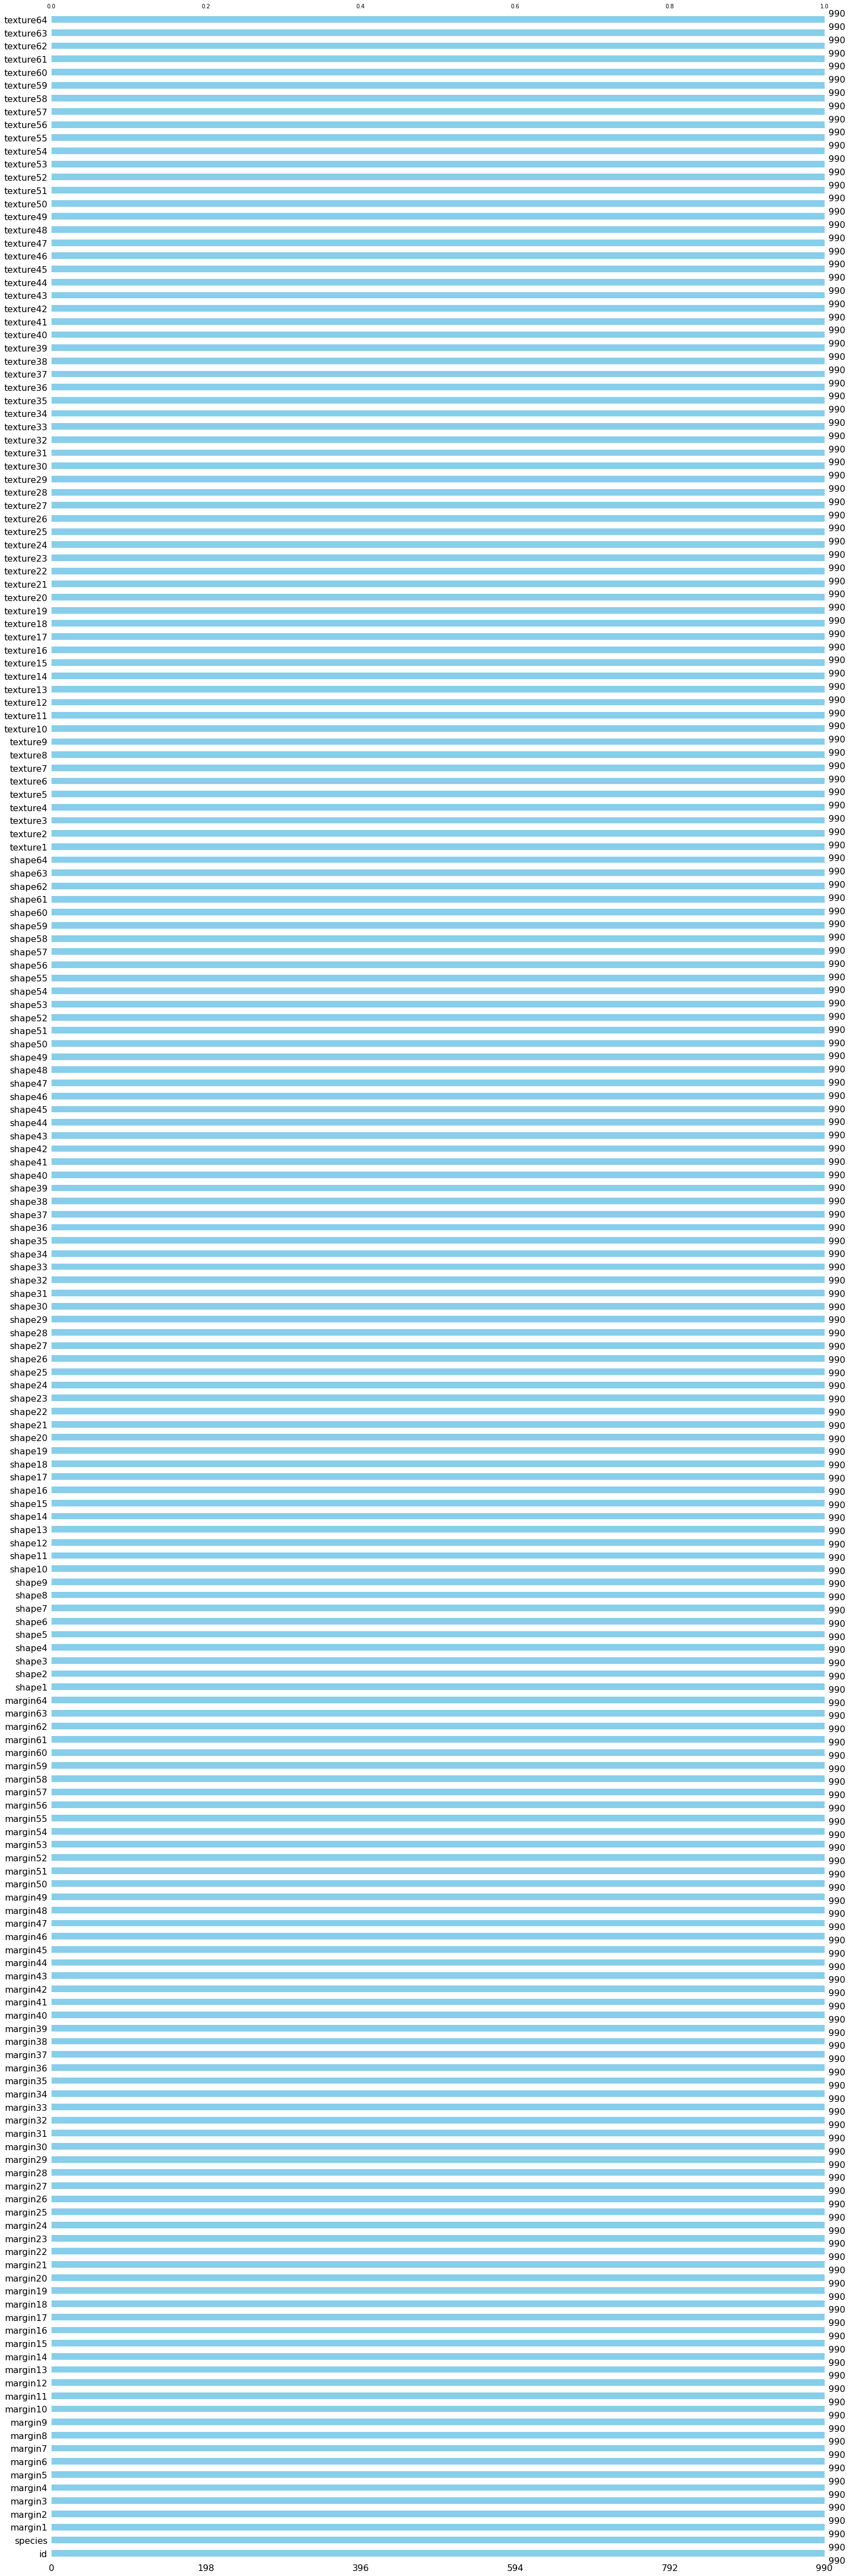

In [9]:
import missingno as msno

msno.bar(train_data, color='skyblue')
plt.show()

Iz prethodne analize se može zaključiti da ne postoje nedostajuće vrednosti u skupu podataka, stoga se može nastaviti sa daljom analizom podataka 

## Ispitivanje korelisanosti podataka

Ponašanje modela mašinskog učenja može umnogome zavisiti od zavisnosti u podacima, stoga je od interesa ispitati korelaciju među podacima pre treniranja modela.

Ispis matrice korelacije

In [10]:
corr_data = train_data.drop('id', axis = 1)
corr_data.corr()

margin1   margin2   margin3   margin4   margin5   margin6  \
margin1    1.000000  0.806390 -0.182829 -0.297807 -0.475874  0.767718   
margin2    0.806390  1.000000 -0.204640 -0.315953 -0.444312  0.825762   
margin3   -0.182829 -0.204640  1.000000  0.120042 -0.185007 -0.163976   
margin4   -0.297807 -0.315953  0.120042  1.000000  0.029480 -0.261437   
margin5   -0.475874 -0.444312 -0.185007  0.029480  1.000000 -0.438587   
...             ...       ...       ...       ...       ...       ...   
texture60  0.035072  0.081069 -0.019850 -0.052317  0.006542  0.066262   
texture61 -0.007581 -0.007057  0.084957  0.320644 -0.109229 -0.050498   
texture62 -0.033159 -0.037405 -0.081999 -0.073886  0.151675 -0.031555   
texture63 -0.075171 -0.098957 -0.148193  0.050970  0.022299 -0.132087   
texture64  0.030414 -0.029532  0.061780  0.014343 -0.148834 -0.003164   

            margin7   margin8   margin9  margin10  ...  texture55  texture56  \
margin1    0.066273 -0.094137 -0.181496  0.397138  ...   0.137158  -0.047771   
margin2   -0.083273 -0.086428 -0.120276  0.162587  ...   0.154407  -0.021096   
margin3    0.095449  0.024350 -0.000042  0.008772  ...   0.047347  -0.027618   
margin4   -0.268271 -0.047693  0.227543 -0.173986  ...  -0.071974  -0.009537   
margin5   -0.108178  0.056557  0.196745 -0.320647  ...  -0.165622   0.059135   
...             ...       ...       ...       ...  ...        ...        ...   
texture60 -0.034094  0.048647 -0.028292  0.020376  ...  -0.129365   0.004412   
texture61 -0.163375 -0.079283  0.088517 -0.127373  ...  -0.002235   0.053707   
texture62  0.015391 -0.048843 -0.031954 -0.014200  ...  -0.217239   0.171577   
texture63 -0.001364  0.027758 -0.119494 -0.039193  ...  -0.207887   0.002057   
texture64  0.068512 -0.003191 -0.097760  0.065964  ...  -0.095205  -0.095913   

           texture57  texture58  texture59  texture60  texture61  texture62  \
margin1     0.126227  -0.024139  -0.168201   0.035072  -0.007581  -0.033159   
margin2     0.123834  -0.063654  -0.157842   0.081069  -0.007057  -0.037405   
margin3     0.007261  -0.021390   0.033505  -0.019850   0.084957  -0.081999   
margin4    -0.050529  -0.044318   0.088857  -0.052317   0.320644  -0.073886   
margin5     0.012938   0.155327   0.149420   0.006542  -0.109229   0.151675   
...              ...        ...        ...        ...        ...        ...   
texture60  -0.155187   0.240704  -0.183369   1.000000  -0.051838   0.265879   
texture61  -0.072814  -0.084638  -0.023539  -0.051838   1.000000  -0.063582   
texture62  -0.283316   0.563088  -0.128010   0.265879  -0.063582   1.000000   
texture63  -0.064724  -0.059866   0.156568  -0.089679  -0.068065  -0.058189   
texture64   0.224686  -0.269157  -0.015374  -0.190194   0.036374  -0.245527   

           texture63  texture64  
margin1    -0.075171   0.030414  
margin2    -0.098957  -0.029532  
margin3    -0.148193   0.061780  
margin4     0.050970   0.014343  
margin5     0.022299  -0.148834  
...              ...        ...  
texture60  -0.089679  -0.190194  
texture61  -0.068065   0.036374  
texture62  -0.058189  -0.245527  
texture63   1.000000   0.029305  
texture64   0.029305   1.000000  

[192 rows x 192 columns]

Pošto skup podataka ima veliki broj kolona, nije jednostavno direktno analizirati korelisanost među podacima. U nastavku su sprovedene zasebne analize za 3 velike grupe atributa: margina, oblik i tekstura. 

In [9]:
def pearson(x,y):
    if len(x)!=len(y):
        print("Couldn't calculate Pearson's Coefficient, sets are not of the same length!")
        return
    else:
        sum_xy = 0
        for i in range(len(x)):
            sum_xy = sum_xy + x[i]*y[i]
        return (sum_xy - len(x)*np.mean(x)*np.mean(y))\
            /((len(x)-1)*np.std(x, ddof=1)*np.std(y, ddof=1))

Pearson's Correlation between neighbours
Margin: 0.015 ± 0.311
Shape: 0.989 ± 0.003
Texture: -0.035 ± 0.184


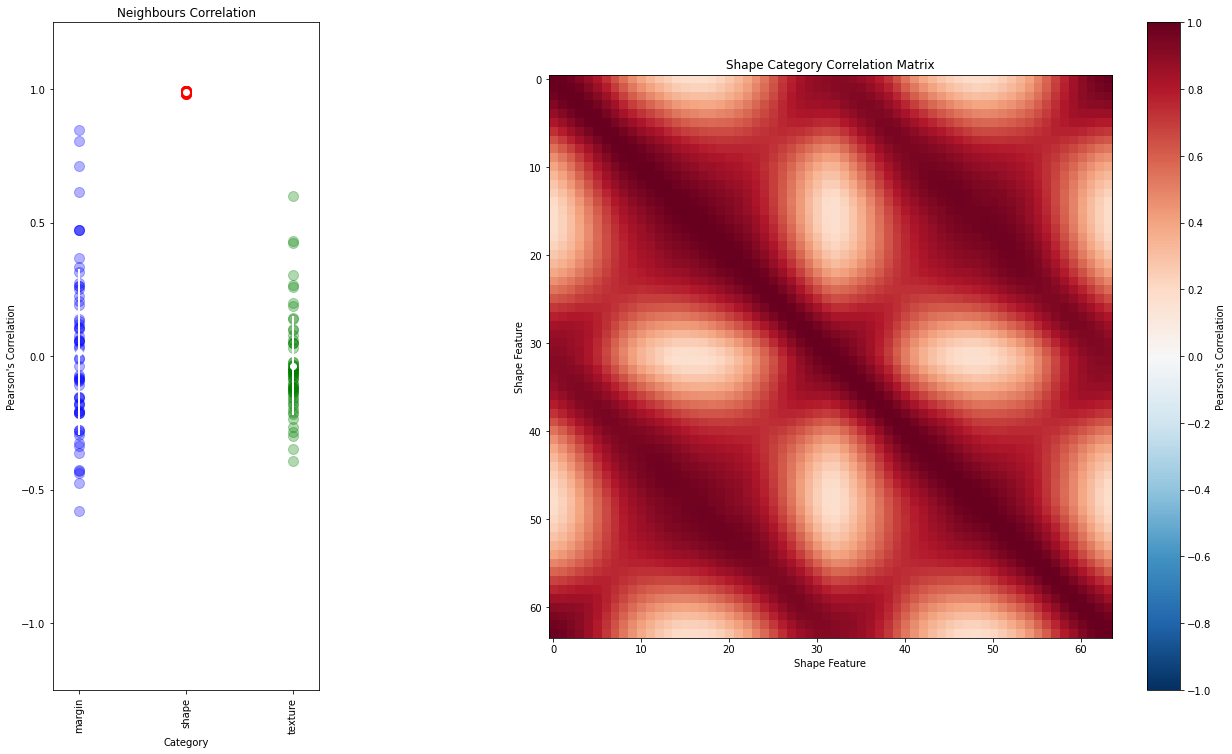

In [10]:
margin_cols = [col for col in train_data.columns if 'margin' in col]
shape_cols = [col for col in train_data.columns if 'shape' in col] 
texture_cols = [col for col in train_data.columns if 'texture' in col] 
margin_pear, shape_pear, texture_pear = [],[],[]

for i in range(1, len(margin_cols)):
    margin_pear.append(pearson(train_data[margin_cols[i-1]],train_data[margin_cols[i]]))

for i in range(1, len(shape_cols)):
    shape_pear.append(pearson(train_data[shape_cols[i-1]],train_data[shape_cols[i]]))
    
for i in range(1, len(texture_cols)):
    texture_pear.append(pearson(train_data[texture_cols[i-1]],train_data[texture_cols[i]]))
    
margin_mean, margin_std = np.mean(margin_pear), np.std(margin_pear, ddof=1)
margin_x=[0]*len(margin_pear)
shape_mean, shape_std =	np.mean(shape_pear), np.std(shape_pear, ddof=1)
shape_x=[1]*len(shape_pear)	
texture_mean, texture_std =	np.mean(texture_pear), np.std(texture_pear, ddof=1)	
texture_x=[2]*len(texture_pear)

fig = plt.figure(figsize=(20, 20))
gs1 = gridspec.GridSpec(2, 2, height_ratios=[1, 1]) 
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
ax1.margins(0.05)
ax2.margins(0.05)

ax1.scatter(margin_x, margin_pear, color='blue', alpha=.3, s=100)
ax1.errorbar([0],margin_mean, yerr=margin_std, color='white', alpha=1, fmt='o', mec='white', lw=2)
ax1.scatter(shape_x, shape_pear, color='red', alpha=.3, s=100)
ax1.errorbar([1],shape_mean, yerr=shape_std, color='white', alpha=1, fmt='o', mec='white', lw=2)
ax1.scatter(texture_x, texture_pear, color='green', alpha=.3, s=100)
ax1.errorbar([2],texture_mean, yerr=texture_std, color='white', alpha=1, fmt='o', mec='white', lw=2)
ax1.set_ylim(-1.25, 1.25), ax1.set_xlim(-0.25, 2.25)
ax1.set_xticks([0,1,2]), ax1.set_xticklabels(['margin','shape','texture'], rotation='vertical')
ax1.set_xlabel('Category'), ax1.set_ylabel('Pearson\'s Correlation')
ax1.set_title('Neighbours Correlation')
ax1.set_aspect(2.5)

print("Pearson's Correlation between neighbours\n==========================================")
print("Margin: " + '{:1.3f}'.format(margin_mean) + u' \u00B1 ' \
       + '{:1.3f}'.format(margin_std))
print("Shape: " + '{:1.3f}'.format(shape_mean) + u' \u00B1 ' \
       + '{:1.3f}'.format(shape_std))
print("Texture: " + '{:1.3f}'.format(texture_mean) + u' \u00B1 ' \
       + '{:1.3f}'.format(texture_std))

shape_mat=[]

for i in range(train_data[shape_cols].shape[1]):
    shape_mat.append([])
    for j in range(train_data[shape_cols].shape[1]):
        shape_mat[i].append(pearson(train_data[shape_cols[i]],train_data[shape_cols[j]]))

cmap = cm.RdBu_r
MS= ax2.imshow(shape_mat, interpolation='none', cmap=cmap, vmin=-1, vmax=1)
ax2.set_xlabel('Shape Feature'), ax2.set_ylabel('Shape Feature')
cbar = plt.colorbar(MS, ticks=np.arange(-1.0,1.1,0.2))
cbar.set_label('Pearson\'s Correlation')
ax2.set_title('Shape Category Correlation Matrix')

gs1.tight_layout(fig)

Na osnovu prethodne analize uočava se velika korelisanost između atrbiuta vezanih za oblik, što je i očekivano. Korelacija grupa atributa je vizuelizovana na grafiku iznad, a dodatno, urađena je i vizuelizacije matrice korelacije za grupu atributa koji opisuju oblik lista

## Modeli mašinskog učenja

Neki od korišćenih modela zahtevaju da labele budu numeričkog tipa, pa je pre modeliranja potrebno uraditi enkodovanje labela. 

In [12]:
encoder=LabelEncoder()
le=encoder.fit(train_data.species)
labels=le.transform(train_data.species)
classes=list(le.classes_)

Podela skupa na podatke za treniranje i podatke za testiranje

In [13]:
from sklearn.model_selection import train_test_split

train_data = train_data.drop(['id','species'],axis=1)
x_train, x_test, y_train, y_test=train_test_split(train_data,labels,test_size=0.20,shuffle=True,stratify=labels)

## Naivni Bajesov klasifikator

&nbsp;&nbsp;&nbsp;&nbsp;Naivni Bajesov klasifikator predstavlja jedan od najjednostavnijih algoritama i zasniva se na Bajesovoj teoremi:
<i>$P(y|x) = \frac{P(x|y)P(x)}{P(y)}$ </i> 
<br/>&nbsp;&nbsp;&nbsp;&nbsp;• <i>y</i> je klasa, <i>x</i> je podatak
<br/>&nbsp;&nbsp;&nbsp;&nbsp;• <i>P(y)</i> je apriorna verovatnoća klase
<br/>&nbsp;&nbsp;&nbsp;&nbsp;• <i>P(y|x)</i> je aposteriorna verovatnoća
<br/>&nbsp;&nbsp;&nbsp;&nbsp;• <i>P(x|y)</i> je funkcija izvesnosti
<br/> &nbsp;&nbsp;&nbsp;&nbsp;Klasifikaciona odluka se postiže tako što se podatak svrstava u onu klasu koja je za njega najverovatnija, tj. ima najveću aposteriornu verovatnoću. Podatak <i>x</i> se predstavlja pomoću nekih <i>n</i> njegovih odlika, <i>$P(x|y) = P(x_1, x_2,..., x_n|y) = P(x_1|y)P(x_2|y)...P(x_n|y)$</i>. Pretpostavka u radu algoritma jeste da odlike nisu statistički zavisne jedna od druge (korelisane), što najčešće nije slučaj sa realnim podacima. Uprkos tome, algoritam često daje dobre rezultate i dodatno, efikasan je i jednostavan za implementaciju. 

Treniranje modela

In [14]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test) 

Ispis rezultata izvršavanja naivnog Bajesovog klasifikatora

In [15]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]
accuracy_Naive Bayes: 0.566
precision_Naive Bayes: 0.566
recall_Naive Bayes: 0.566
f1-score_Naive Bayes : 0.566


### <i>Principal Component Analysis</i>

&nbsp;&nbsp;&nbsp;&nbsp;Primena Bajesovog klasifikatora nad osnovnim podacima ne daje zadovoljavajuće rezultate. Ovakav ishod je očekivan, imajući u vidu analizu korelisanosti podataka koja je ranije sprovedena. Tu je pokazano da su atributi vezani za oblik (<i>shape</i>) visoko korelisani. Postoji niz tehnika za poboljšanje rada algoritma, a jedna od najčešćih je transformacija ulaznog skupa podataka. Ovde je za transformaciju podataka iskorišćena pca. 

In [16]:
pca = PCA(n_components = 'mle', svd_solver = 'full')
train_data_pca = pca.fit_transform(train_data)

print("Number of descriptors before PCA: " + '{:1.0f}'.format(train_data.shape[1]))
print("Number of descriptors after PCA: " + '{:1.0f}'.format(train_data_pca.shape[1]))

Number of descriptors before PCA: 192
Number of descriptors after PCA: 191


In [17]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca=train_test_split(train_data_pca,labels,test_size=0.20,shuffle=True,stratify=labels)

Treniranje modela nad transformisanim podacima

In [18]:
gaussian = GaussianNB()
gaussian.fit(x_train_pca, y_train_pca)
y_pred = gaussian.predict(x_test_pca) 

Ispis dobijenih rezultata naivnog Bajesovog klasifikatora nad transformisanim podacima

In [19]:
cm = confusion_matrix(y_test_pca, y_pred)
accuracy = accuracy_score(y_test_pca,y_pred)
precision = precision_score(y_test_pca, y_pred, average='micro')
recall =  recall_score(y_test_pca, y_pred, average='micro')
f1 = f1_score(y_test_pca, y_pred, average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
accuracy_Naive Bayes: 0.924
precision_Naive Bayes: 0.924
recall_Naive Bayes: 0.924
f1-score_Naive Bayes : 0.924


## K najbližih suseda (<i>K-Nearest Neighbours</i>)

&nbsp;&nbsp;&nbsp;&nbsp;Algoritam k najbližih suseda (<i>k-nearest neighbors</i>) je tip nadgledanih algoritama mašinskog učenja. Najčešće se koristi kod problema klasifikacije. Algoritam polazi od pretpostavke da će se slične instance nalaziti bliže u prostoru. Algoritam klasifikuje određenu instancu na osnovu klasifikacije k najbližih instanci prostim prebrojavanjem svake klase. <br/>
&nbsp;&nbsp;&nbsp;&nbsp;Algoritam započinje biranjem vrednosti za k, potom računa rastojanje od posmatrane instance do svih instanci u skupu podataka, sortira ih i bira k instanci sa namanjim rastojanjem na osnovu kojih daje rezultat.
Za pronalaženje najbližih suseda između dve tačke P i Q u Ndimenzionalnom prostoru date koordinatama P=(p1, p2, ... , pN) i Q=(q1, q2, ... , qN) može se koristiti neka od sledećih metrika:
<br/>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;• Euklidska razdaljina - $\sqrt{\sum_{i=1}^n (p_i - q_i)^2}$
<br/>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;• Menhetn razdaljina - $\sum_{i=1}^n |p_i - q_i|$
<br/>
<br/>&nbsp;&nbsp;&nbsp;&nbsp;• Čebiševa razdaljina - $\max(|𝑝𝑖 − 𝑞𝑖|)$

&nbsp;&nbsp;&nbsp;&nbsp;Pre početka rada algoritma radimo transformaciju ulaznog skupa podataka u vidu skaliranja, kako bi svaki atribut podjednako doprinosio pri računanju rastojanja, a samim tim i odlučivanju.

In [20]:
knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 1))
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test) 

Ispis rezultata izvršavanja knn algoritma

In [21]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision =precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
accuracy_KNN : 0.965
precision_KNN : 0.965
recall_KNN: 0.965
f1-score_KNN : 0.965


Ispitivanje rada algoritma za različite vrednosti k i vizuelizacija dobijene tačnosti

C:\Users\popov\AppData\Local\Temp/ipykernel_10708/3856894687.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()


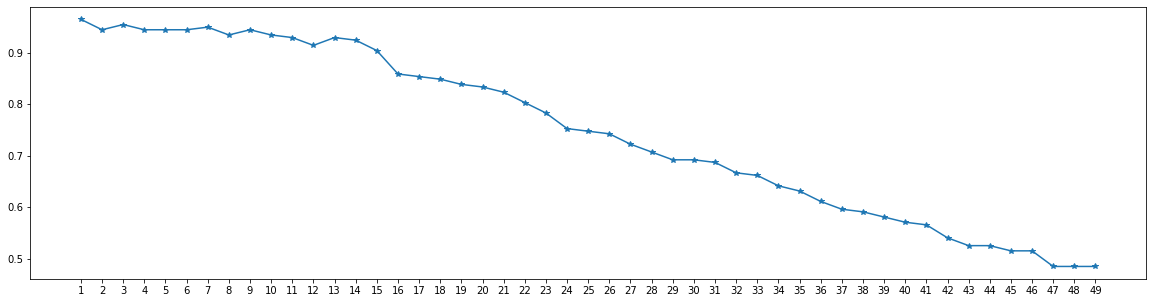

In [22]:
plt.subplots(figsize=(20,5))
a_index=list(range(1,50))
a=pd.Series()
x=range(1,50)
for i in list(range(1,50)):
    model= make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=i)) 
    model.fit(x_train, y_train) 
    prediction=model.predict(x_test)
    a=a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index, a,marker="*")
plt.xticks(x)
plt.show()

## <i>Random Forest</i> klasifikator



&nbsp;&nbsp;&nbsp;&nbsp;Stabla odlučivanja su tip nadgledanih algoritama mašinskog učenja. Najčešće se koriste kod problema klasifikacije.
Stablo odlučivanja je stablo u kojem je:
    <br/>&nbsp;&nbsp;&nbsp;&nbsp;• svakom unutrašnjem čvoru pridružen jedan ulazni parameter (atribut)
    <br/>&nbsp;&nbsp;&nbsp;&nbsp;• svakoj grani pridružena jedna vrednost ulaznog parametra čvora od kojeg grana
      počinje
    <br/>&nbsp;&nbsp;&nbsp;&nbsp;• svakom listu pridružen izlazni parametar u zavisnosti od vrednosti ulaznih
      parametara na datom putu kroz stablo, od korena do posmatranog lista
<br/>&nbsp;&nbsp;&nbsp;&nbsp;Stablo se gradi od korena ka listovima, tzv. pohlepnim (greedy) pristupom. Na početku sve instance prostora pripadaju istom skupu, nakon čega se prostor sukcesivno deli na podskupove. Deljenje je pohlepno zato što se pri svakom koraku najbolja podela određuje na osnovu stanja u posmatranom koraku, odnosno ne uzima se u obzir kako će se podela izvršiti u narednim koracima i koja bi podela mogla dovesti do boljih rezultata u narednim koracima.

&nbsp;&nbsp;&nbsp;&nbsp;Random forest klasifikator se sastoji od više posebnih stabala odlučivanja. Pri radu algoritma, svako stablo daje svoju predikciju, a izlaz algoritma, odnosno krajnja predikcija je klasa sa najvećim brojem.   

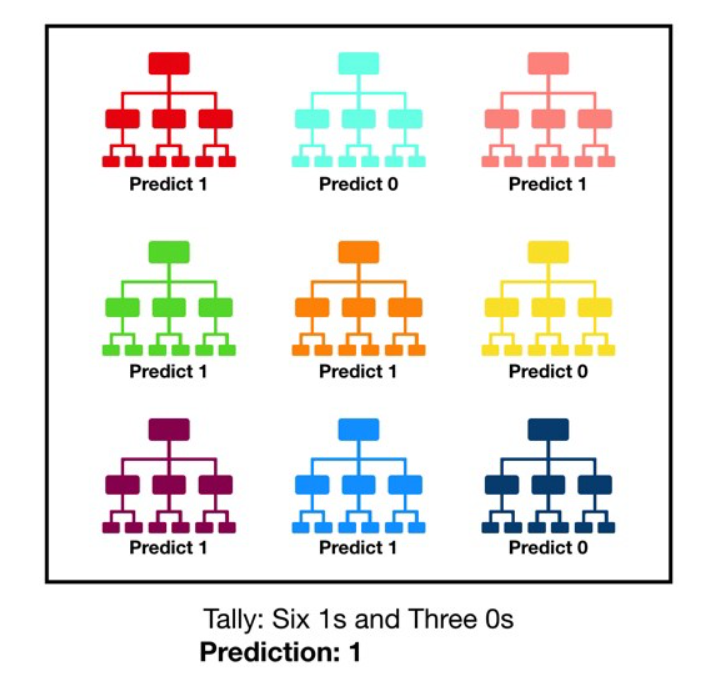

&nbsp;&nbsp;&nbsp;&nbsp;Osnovna ideja algoritma jeste da će veći broj relativno nekorelisanih modela (stabala) uvek dati bolje rezultate od pojedinačnih stabala. Veći broj stabala štiti pojedinačno stablo od sopstvenih anomalija u odlučivanju. Nekorelisanost pojedinačnih stabala se postiže dvema tehnikama:
 <br/>&nbsp;&nbsp;&nbsp;&nbsp;• <b>pakovanje (<i>bagging</i>)</b> - svako stablo uzima slučajan uzorak podataka, što rezultira različitim ulaznim stablima (ekspolatiše se osobina osetljivosti stabala odlučivanja na ulazni skup podataka) 
 <br/>&nbsp;&nbsp;&nbsp;&nbsp;• <b>slučajan odabir atributa</b> - pri grananju stabla, moguće je odabrati atribut iz ograničenog skupa, za razliku od klasičnih stabala odlučivanja gde se posmatra svaka moguća podela, odnosno atribut
 <br/>
 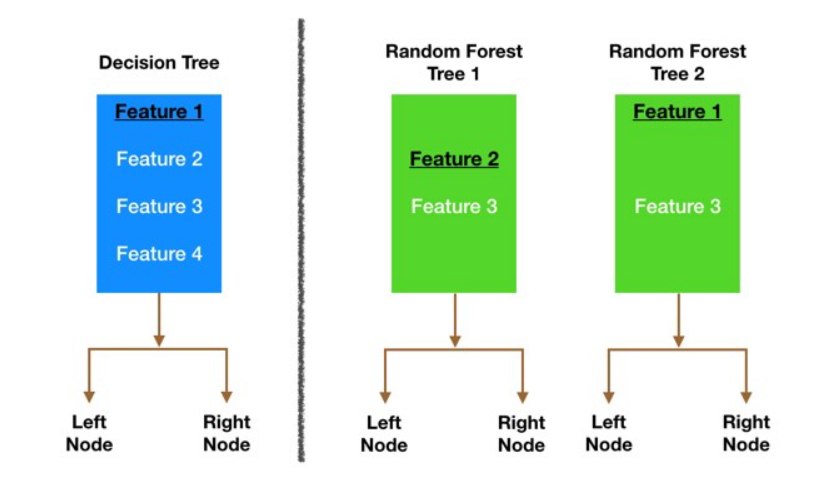


Treniranje modela

In [25]:
rfb = make_pipeline(StandardScaler(), RandomForestClassifier())
rfb.fit(x_train, y_train)
y_pred = rfb.predict(x_test) 

Ispis dobijenih rezultata <i>Random Forest</i> klasifikatora

In [26]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Confusion matrix for RFB\n',cm)
print('accuracy_RFB : %.3f' %accuracy)
print('precision_RFB : %.3f' %precision)
print('recall_RFB: %.3f' %recall)
print('f1-score_RFB : %.3f' %f1)

Confusion matrix for RFB
 [[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
accuracy_RFB : 0.975
precision_RFB : 0.975
recall_RFB: 0.975
f1-score_RFB : 0.975


## Metoda potpornih vektora (<i>Support Vector Machine </i>)

&nbsp;&nbsp;&nbsp;&nbsp;Metoda potpornih vektora je jedan od najznačajnih algoritama mašinskog učenja. <i>SVM</i> daje veoma dobre rezultate na širokom spektru problema i manje je sklona <i>overfitting</i>-u od mnogih drugih metoda. Fleksibilnost u algoritmu se postiže mogučnošću podešavanja više parametara. Nedostaci metoda su brzina rada algoritma i osetljivost na <i>outlier</i>-e.<br/>
&nbsp;&nbsp;&nbsp;&nbsp;Metoda se zasniva na pronalasku hiperravni koja razdvaja podatke različitih klasa i koja će se kasnije koristiti za predikciju nad novim podacima. Hiperravan se bira tako da je margina među podacima različitih klasa najveća moguća (slika ispod). Pronalaženje hiperravni je moguće raditi samo nad podacima koji su linearno separablini, ukoliko to nije slučaj radi se preslikavanje podataka u prostor većih dimenzija gde će ih biti moguće razdvojiti. 
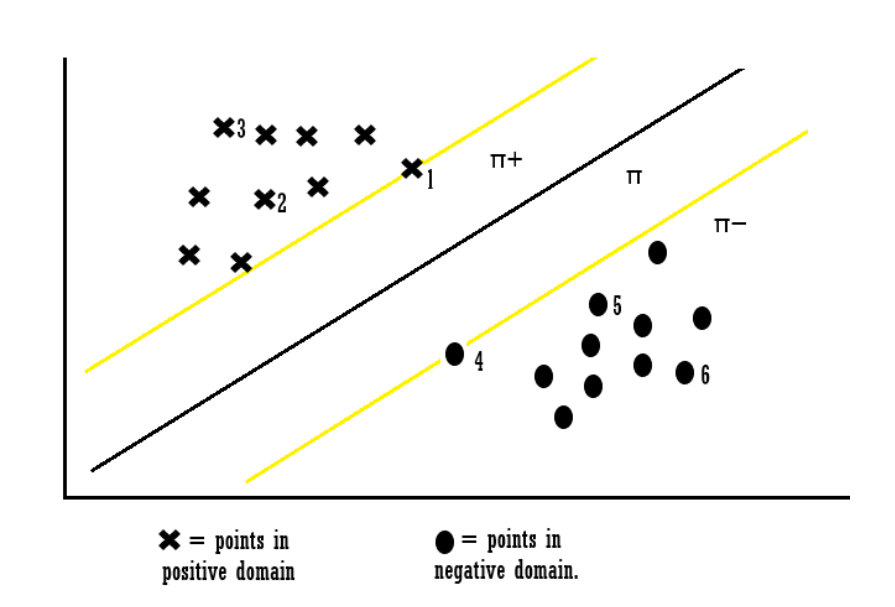

&nbsp;&nbsp;&nbsp;&nbsp;Ponašanje algoritma može značajno varirati u zavisnosti od parametara c i γ. C je parametar kojim se penalizuje greška u klasifikaciji nad treniranim skupom podataka. Predstavlja kompromis između veće margine razdvajanja i pravilnog klasifikovanja podataka za treniranje. Veća vrednost parametra smanjuje grešku klasifikacije po cenu manje margine razdvajanja, i obrnuto. <br/>
&nbsp;&nbsp;&nbsp;&nbsp;Vrednost parametra γ je inverzna širini Gausove krive. Veoma mala vrednost γ znači da je Gausova kriva izuzetno široka, odnosno svaki potporni vektor donekle ima efekat na klasifikaciju svih podataka. Posledica jeste spora prilagodljivost modela podacima. Sa druge strane povećanjem γ, smanjuje se broj podataka koji utiču na klasifikaciju, što za posledicu ima veliku varijansu modela. Pošto se ovde radi o relativno malom skupu podataka, ispitano je ponašanje modela za veći broj kombinacija parametara c i γ.    

In [27]:
gammas = [0.001, 0.01, 0.1, 1, 10, 100]
cs = [0.1, 1, 10, 100, 1000]
for gamma in gammas:
    for c in cs:
        svc = make_pipeline(StandardScaler(),svm.SVC(gamma = gamma, C = c))
        svc.fit(x_train, y_train)
        print(f'score SVC(gamma = {gamma}, C = {c}):', svc.score(x_test,y_test))

score SVC(gamma = 0.001, C = 0.1): 0.9545454545454546
score SVC(gamma = 0.001, C = 1): 0.9595959595959596
score SVC(gamma = 0.001, C = 10): 0.9696969696969697
score SVC(gamma = 0.001, C = 100): 0.9696969696969697
score SVC(gamma = 0.001, C = 1000): 0.9696969696969697
score SVC(gamma = 0.01, C = 0.1): 0.9595959595959596
score SVC(gamma = 0.01, C = 1): 0.9646464646464646
score SVC(gamma = 0.01, C = 10): 0.9646464646464646
score SVC(gamma = 0.01, C = 100): 0.9646464646464646
score SVC(gamma = 0.01, C = 1000): 0.9646464646464646
score SVC(gamma = 0.1, C = 0.1): 0.41414141414141414
score SVC(gamma = 0.1, C = 1): 0.6767676767676768
score SVC(gamma = 0.1, C = 10): 0.702020202020202
score SVC(gamma = 0.1, C = 100): 0.702020202020202
score SVC(gamma = 0.1, C = 1000): 0.702020202020202
score SVC(gamma = 1, C = 0.1): 0.5505050505050505
score SVC(gamma = 1, C = 1): 0.21717171717171718
score SVC(gamma = 1, C = 10): 0.23737373737373738
score SVC(gamma = 1, C = 100): 0.23737373737373738
score SVC(gam

Treniranje modela za kombinaciju parametara c = 10 i γ = 0,001

In [28]:
svc = make_pipeline(StandardScaler(), svm.SVC(gamma = 0.001, C = 10))
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test) 

Ispis dobijenih rezultata metode potpornih vektora

In [29]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test, y_pred,average='micro')
recall =  recall_score(y_test, y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print('Confusion matrix for SVM\n',cm)
print('accuracy_SVC : %.3f' %accuracy)
print('precision_SVC : %.3f' %precision)
print('recall_SVC: %.3f' %recall)
print('f1-score_SVC : %.3f' %f1)

Confusion matrix for SVM
 [[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
accuracy_SVC : 0.970
precision_SVC : 0.970
recall_SVC: 0.970
f1-score_SVC : 0.970
